# Life Expectancy Data Understanding
This notebook focuses on understanding the data and identifying problems, not solving them
## Project Overview
This project aims to analyze global life expectancy data provided by the World Health Organization (WHO) and identify the key factors that influence life expectancy across different countries over time.

The focus is not only on building predictive models, but also on understanding the underlying data, relationships, and real-world implications of health, economic, and social factors.



## Dataset Description

**Dataset Name:** Life Expectancy (WHO)  
**Source:** World Health Organization (WHO) & United Nations  
**Time Period:** 2000 – 2015  
**Number of Countries:** 193  
**Target Variable:** Life Expectancy  

**Dataset Link:**  
https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

The dataset contains health, economic, immunization, and social indicators collected for multiple countries over a 15-year period. It was designed to study how different factors contribute to variations in life expectancy across nations.


## Analytical Motivation

Understanding the factors that affect life expectancy is critical for policymakers and health organizations.
This analysis can help identify which areas (healthcare, education, immunization, or economic development)
should be prioritized to improve population longevity, especially in countries with low life expectancy.


## import needed libarary & set style 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

sys.path.append(str(Path("../src").resolve()))

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
from plot_style import set_plot_style

set_plot_style()

## 1. Data Loading



In [35]:
from data_loader import load_data
df = load_data("../data/raw/Life Expectancy Data.csv")

In [36]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 2. Dataset Shape and Structure

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               


- Most numerical features already have appropriate data types and do not require changes.
- The `Status` feature is categorical and was converted to the `category` data type.
- The `Country` feature was also converted to `category` to improve memory efficiency and grouping operations.
- The `Year` feature was kept as an integer since it represents a time index and may be used in trend analysis.
- Some column names have extra spaces at the beginning or the end, so these spaces were removed.


## Column Descriptions
- **Country**: The name of the country.
- **Year**: The year when the data was recorded.
- **Status**: Indicates whether the country is Developed or Developing.

- **Life expectancy**: The average number of years a person is expected to live.  
  This is the target variable we want to analyze and predict.

- **Adult Mortality**: The probability of dying between the ages of 15 and 60 per 1000 population.
- **infant deaths**: Number of infant deaths per 1000 population.
- **under-five deaths**: Number of deaths of children under five years old per 1000 population.

- **Alcohol**: Average alcohol consumption per capita.
- **percentage expenditure**: Percentage of government expenditure on health.
- **Total expenditure**: Total health expenditure as a percentage of GDP.

- **Hepatitis B**: Immunization coverage for Hepatitis B (percentage).
- **Polio**: Immunization coverage for Polio (percentage).
- **Diphtheria**: Immunization coverage for Diphtheria (percentage).
- **Measles**: Number of reported measles cases.

- **BMI**: Average Body Mass Index of the population.
- **HIV/AIDS**: Deaths per 1000 population due to HIV/AIDS.

- **GDP**: Gross Domestic Product per capita.
- **Population**: Total population of the country.

- **thinness 1-19 years**: Percentage of thinness among people aged 1 to 19 years.
- **thinness 5-9 years**: Percentage of thinness among children aged 5 to 9 years.

- **Income composition of resources**: Index that reflects income distribution and economic development.
- **Schooling**: Average number of years of schooling.


In [38]:
df.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
917,Finland,2012,Developing,84.0,82.0,0,9.24,5889.012536,NaN,0,...,99.0,9.30,99.0,0.1,47415.559870,5413971.0,0.9,0.8,0.884,17.0
2235,Saudi Arabia,2013,Developing,74.3,89.0,8,0.09,2047.113102,98.0,1164,...,98.0,4.25,98.0,0.1,24934.386140,NaN,7.6,7.5,0.830,15.2
1109,Guyana,2012,Developing,65.8,22.0,0,7.57,497.471946,97.0,0,...,97.0,6.57,97.0,0.3,3785.935665,75391.0,5.6,5.3,0.630,10.6
2014,Peru,2008,Developing,73.9,138.0,11,4.85,58.498974,93.0,1,...,93.0,4.73,93.0,0.3,428.878110,2864198.0,1.2,1.2,0.700,13.2
2332,Slovakia,2012,Developed,75.8,118.0,0,10.12,0.000000,99.0,0,...,99.0,8.15,99.0,0.1,NaN,NaN,1.2,1.3,0.835,15.0


In [39]:
df.nunique().sort_values(ascending = False)

GDP                                2490
percentage expenditure             2328
Population                         2278
Alcohol                            1076
Measles                             958
Total expenditure                   818
Income composition of resources     625
 BMI                                608
Adult Mortality                     425
Life expectancy                     362
under-five deaths                   252
infant deaths                       209
 thinness 5-9 years                 207
 HIV/AIDS                           200
 thinness  1-19 years               200
Country                             193
Schooling                           173
Hepatitis B                          87
Diphtheria                           81
Polio                                73
Year                                 16
Status                                2
dtype: int64

## **Basic Statistic**

In [40]:
df.describe(include='object').T

,count,unique,top,freq
Country,2938,193,Afghanistan,16
Status,2938,2,Developing,2426


In [41]:
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


## Missing Values Overview

In [42]:
missing = df.isna().sum().sort_values(ascending = False)
print(f'Total Number of missing values in the Dataset {missing.sum()}\n')
missing = missing[missing>0]
missing

Total Number of missing values in the Dataset 2563



Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 thinness 5-9 years                 34
 thinness  1-19 years               34
 BMI                                34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
dtype: int64

In [43]:
(df.isna().sum()*100/len(df)).round(2).sort_values(ascending = False)

Population                         22.19
Hepatitis B                        18.82
GDP                                15.25
Total expenditure                   7.69
Alcohol                             6.60
Income composition of resources     5.68
Schooling                           5.55
 thinness 5-9 years                 1.16
 thinness  1-19 years               1.16
 BMI                                1.16
Polio                               0.65
Diphtheria                          0.65
Life expectancy                     0.34
Adult Mortality                     0.34
 HIV/AIDS                           0.00
Country                             0.00
Year                                0.00
Measles                             0.00
percentage expenditure              0.00
infant deaths                       0.00
Status                              0.00
under-five deaths                   0.00
dtype: float64

In [44]:
#sns.heatmap(df.select_dtypes(include='number'), annot=True, annot_kws={"size": 10})

In [45]:
# Print the top-3 most missed features
top_3 = missing.nlargest(3)
print("Top-3 most missed features:")
print(top_3)

Top-3 most missed features:
Population     652
Hepatitis B    553
GDP            448
dtype: int64


In [46]:
from preprocessing import Check_Pattern,Missing_Pattern


In [47]:
for col in top_3.index:
    Missing_Pattern(col, top_3, df)



Feature: Population
---------------------------------
	- Number of missing values: 652
	- Percentage of missing values: 22.19%
	- Data type: float64
	- Number of unique values: 2278
	- Most common value: 444.0

Missing value pattern:
------------------------------
	- Missing values in `Population` depend on the values of other columns. Columns that have 1 or 2 unique are: ['Status_unique_vals']
	- So that the missing pattern mechanism should be: Missing At Random (MAR) or Missing Not At Random (MNAR)

Feature: Hepatitis B
---------------------------------
	- Number of missing values: 553
	- Percentage of missing values: 18.82%
	- Data type: float64
	- Number of unique values: 87
	- Most common value: 99.0

Missing value pattern:
------------------------------
	- Missing values in `Hepatitis B` depend on the values of other columns. Columns that have 1 or 2 unique are: ['Status_unique_vals']
	- So that the missing pattern mechanism should be: Missing At Random (MAR) or Missing Not At R

## Observations

- The `Population` feature has a high number of missing values (22.19%).
  These missing values are related to the country status (Developed or Developing),
  which means they are not random.

- The `Hepatitis B` feature also contains missing values (18.82%).
  The missing data appears more often in specific country groups,
  likely due to differences in healthcare reporting.

- The `GDP` feature has missing values in about 15.25% of the dataset.
  Missing values are linked to country status and health expenditure.

- In general, missing values in these features are not completely random.
  Using a simple global mean or median may lead to biased results.

- A group-based imputation strategy is more suitable to handle these missing values.


## Missing Values Summary and Decisions

Based on the missing value percentages and the missingness analysis, the following decisions were made for each feature.

- **Population (22.19%)**  
  High percentage of missing values.  
  Missingness is related to country status.  
  **Decision:** Apply group-wise median imputation based on `Status`.

- **Hepatitis B (18.82%)**  
  Significant missing values related to country status.  
  **Decision:** Apply group-wise median imputation based on `Status`.

- **GDP (15.25%)**  
  Missing values depend on country status and health expenditure.  
  **Decision:** Apply group-wise median imputation based on `Status`.

- **Total expenditure (7.69%)**  
  Moderate amount of missing values.  
  **Decision:** Use median imputation.

- **Alcohol (6.60%)**  
  Moderate missing values with possible outliers.  
  **Decision:** Use median imputation.

- **Income composition of resources (5.68%)**  
  Small to moderate missing values.  
  **Decision:** Use median imputation.

- **Schooling (5.55%)**  
  Small to moderate missing values.  
  **Decision:** Use median imputation.

- **thinness 5-9 years (1.16%)**  
  Very low missing values.  
  **Decision:** Use median imputation.

- **thinness 1-19 years (1.16%)**  
  Very low missing values.  
  **Decision:** Use median imputation.

- **BMI (1.16%)**  
  Very low missing values.  
  **Decision:** Use median imputation.

- **Polio (0.65%)**  
  Very few missing values.  
  **Decision:** Use median imputation.

- **Diphtheria (0.65%)**  
  Very few missing values.  
  **Decision:** Use median imputation.

- **Life expectancy (0.34%)**  
  Target variable with very few missing values.  
  **Decision:** Drop rows with missing values.

- **Adult Mortality (0.34%)**  
  Very few missing values.  
  **Decision:** Drop rows with missing values.

# Duplicate Checks

In [48]:
df.duplicated().sum()

0

# Target Analysis

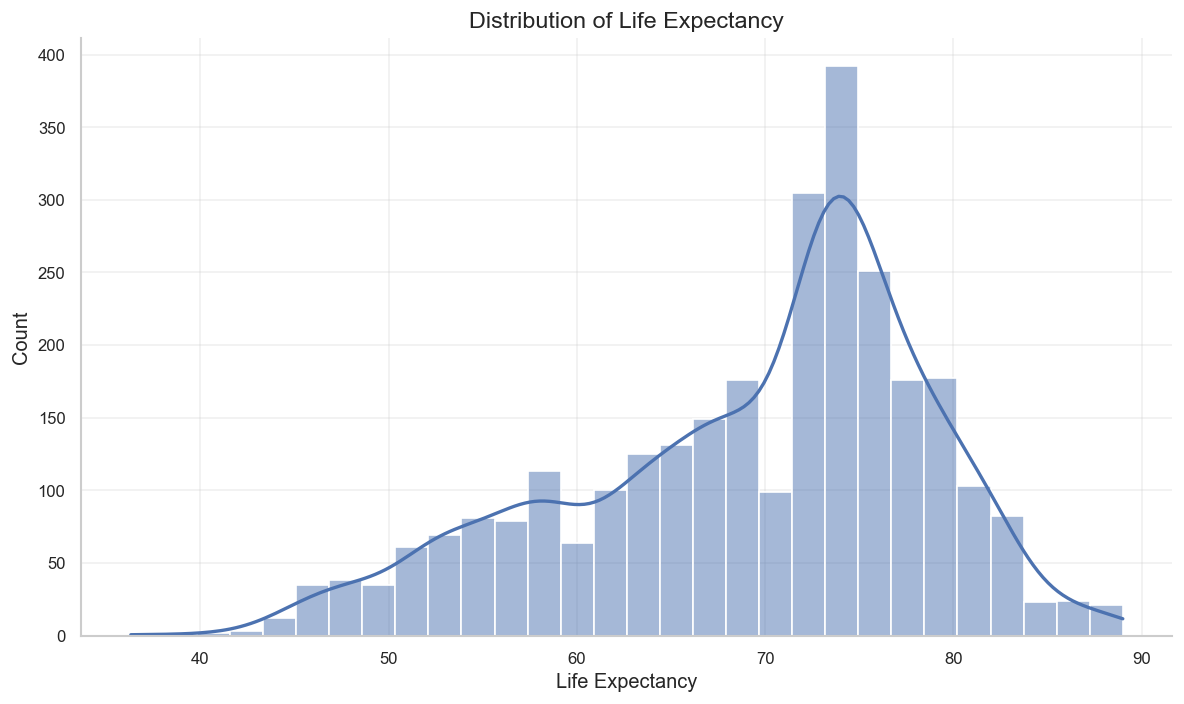

In [50]:
sns.histplot(df['Life expectancy '], bins=30, kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Count')
plt.show()


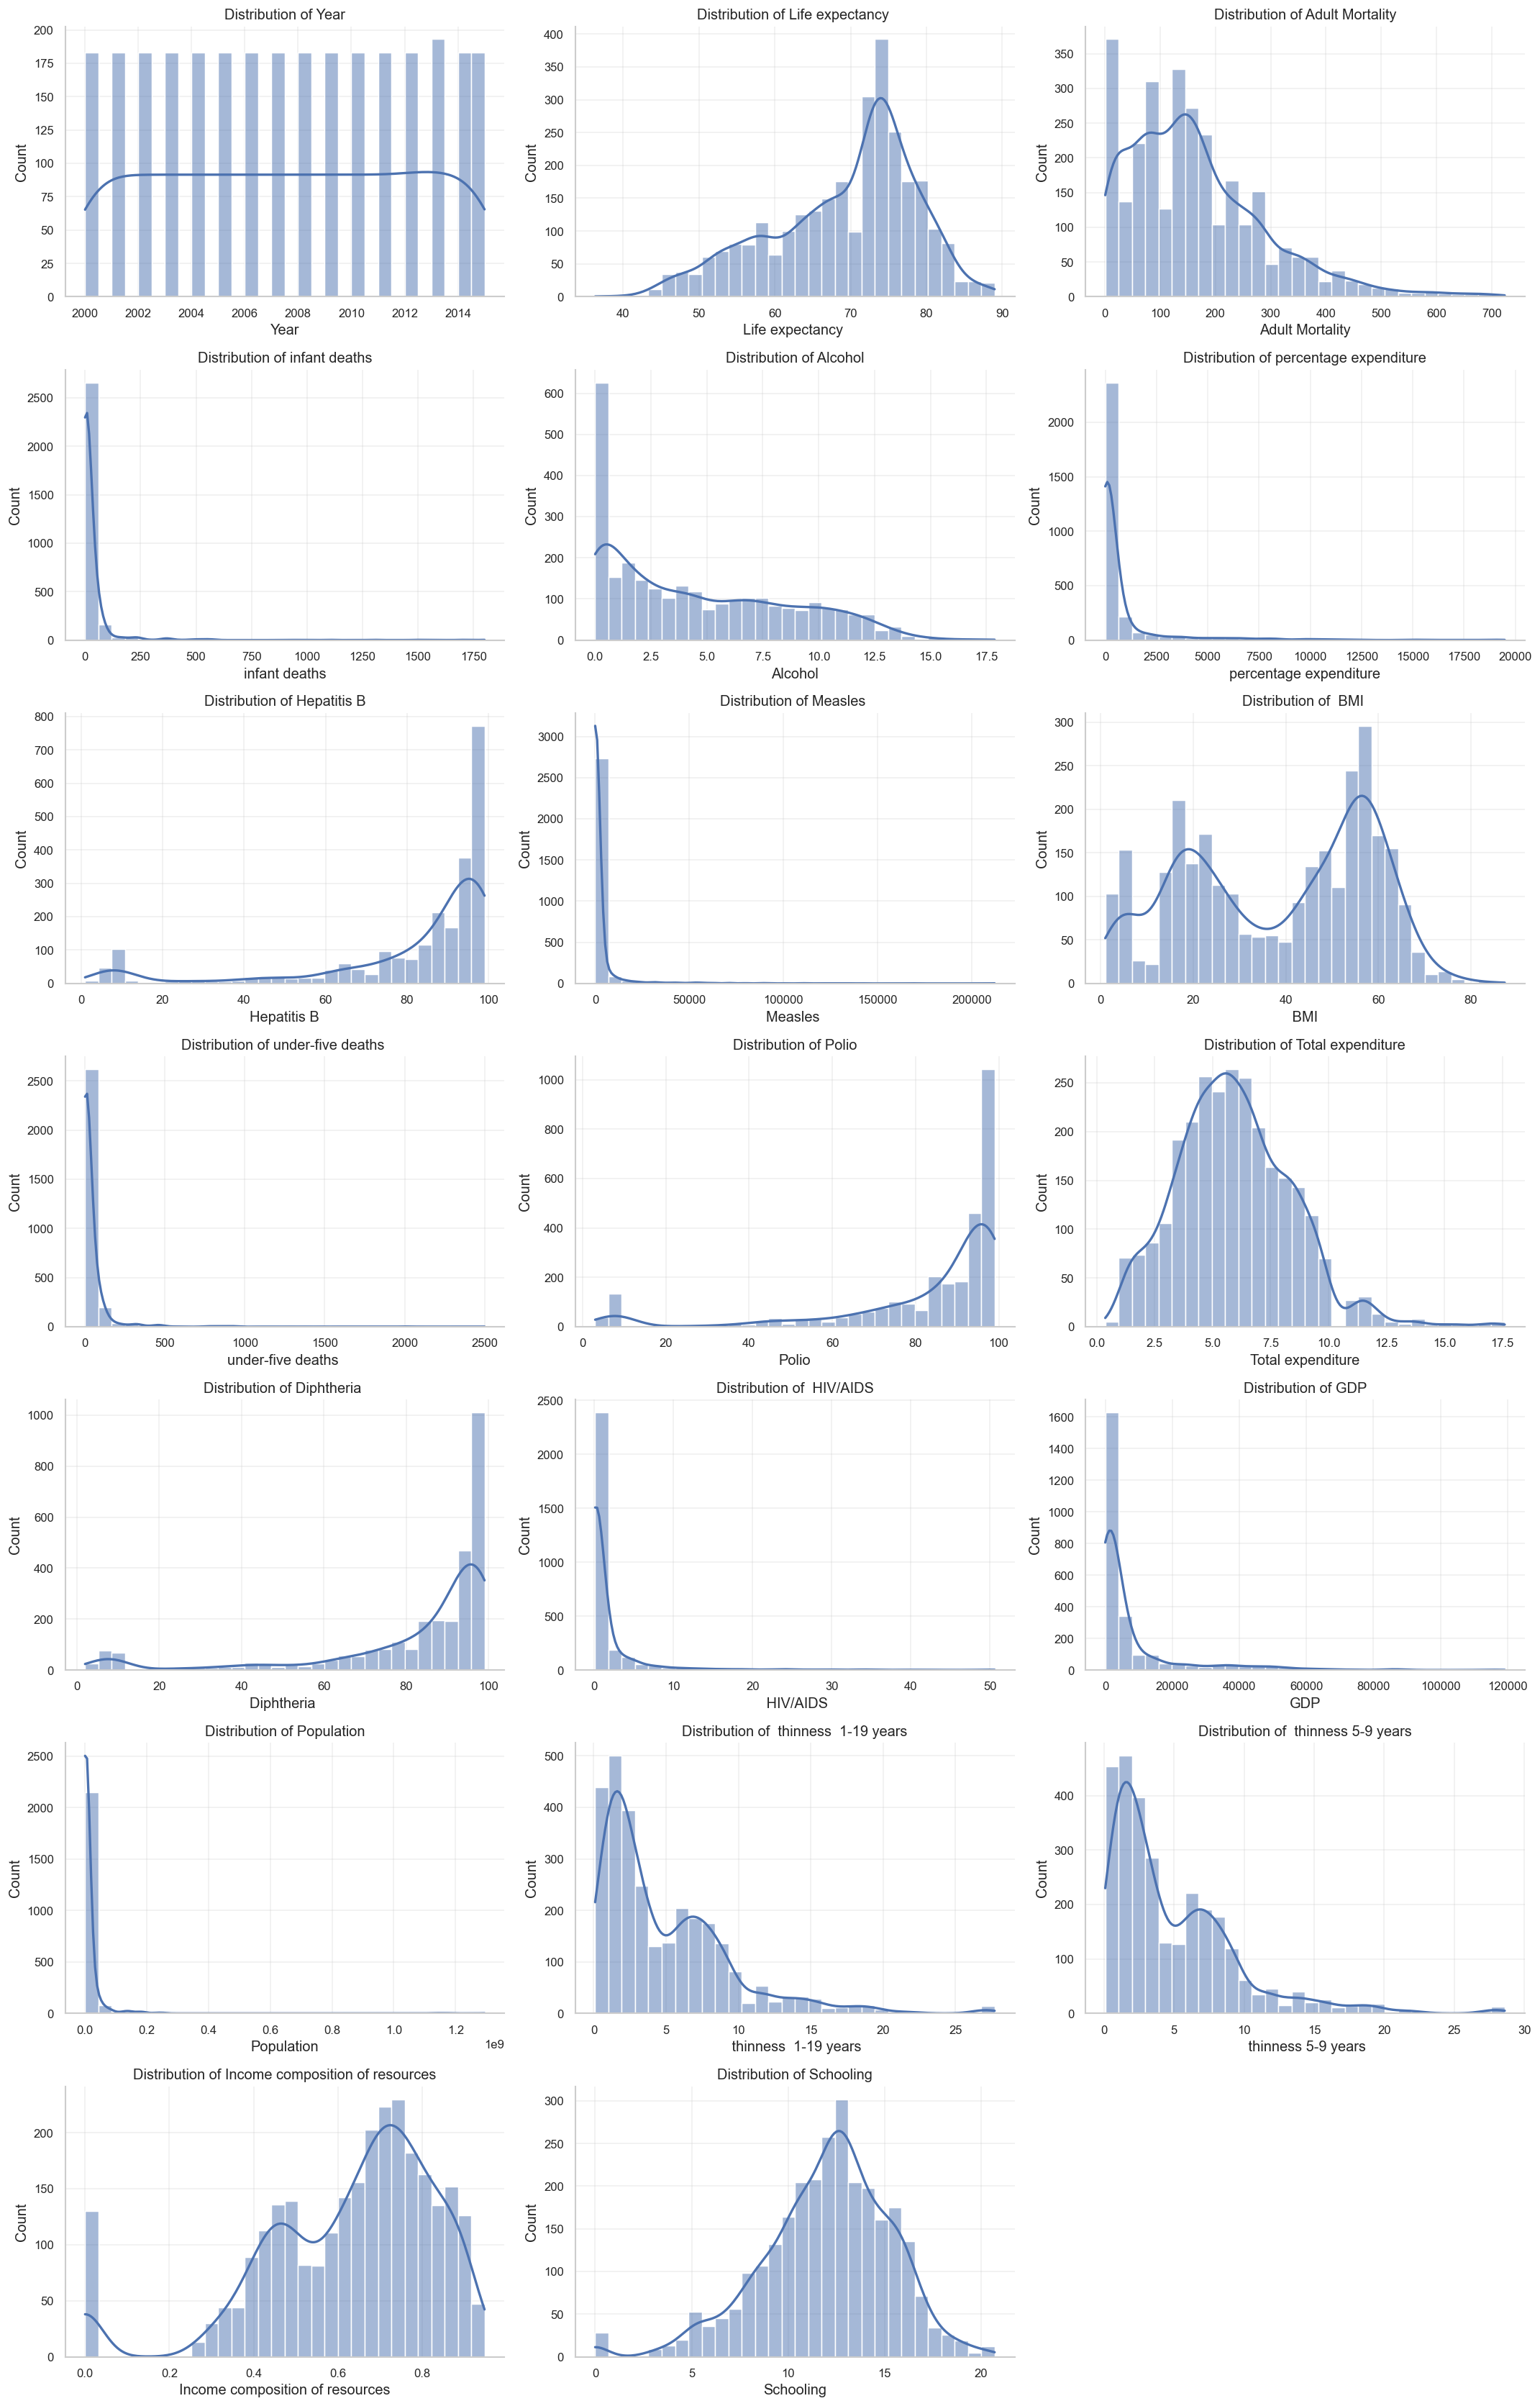

In [51]:

numeric_cols = df.select_dtypes(include='number').columns

# number of columns in the grid
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

# create figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [52]:

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} Number of outliers: {outliers.shape[0]}")


Year Number of outliers: 0
Life expectancy  Number of outliers: 10
Adult Mortality Number of outliers: 82
infant deaths Number of outliers: 315
Alcohol Number of outliers: 0
percentage expenditure Number of outliers: 389
Hepatitis B Number of outliers: 254
Measles  Number of outliers: 542
 BMI  Number of outliers: 0
under-five deaths  Number of outliers: 394
Polio Number of outliers: 279
Total expenditure Number of outliers: 32
Diphtheria  Number of outliers: 298
 HIV/AIDS Number of outliers: 542
GDP Number of outliers: 365
Population Number of outliers: 294
 thinness  1-19 years Number of outliers: 89
 thinness 5-9 years Number of outliers: 96
Income composition of resources Number of outliers: 130
Schooling Number of outliers: 44


## Distribution and Outliers Summary

- The distributions show that most numerical features are not normally distributed and exhibit varying degrees of right skewness.

- The target variable, `Life_expectancy`, has a near-normal distribution with a limited number of outliers, indicating stable and reliable target behavior.

- Economic and population-related features such as `GDP`, `Population`, and `percentage_expenditure` show a high number of outliers, which reflects large real-world differences between countries.

- Health and mortality features (`infant_deaths`, `under-five_deaths`, `Measles`, `HIV/AIDS`) contain many outliers and are heavily skewed, representing extreme health conditions in some countries.

- Features like `Year`, `Alcohol`, `BMI`, and `Schooling` show few or no outliers, indicating more balanced distributions.

- Outliers were not removed, as they represent meaningful real-world variations. Instead, appropriate transformations or robust modeling techniques may be considered in later stages.


## Summary of Data Understanding

In this notebook, the main goal was to understand the dataset and identify potential issues before performing any data cleaning or preprocessing.

### What was done
- Loaded the dataset and reviewed its general structure.
- Set a consistent plotting style and verified the required libraries.
- Inspected sample rows to understand the data format and values.
- Used `info()` and `describe()` to examine data types, ranges, and basic statistics.
- Identified inconsistent column naming (extra spaces) and noted that this issue will be handled in the data cleaning stage.
- Analyzed missing values and their percentages across all features.
- Investigated missing value patterns and identified whether missingness is random or related to other features.
- Visualized the distribution of the target variable and all numerical features.
- Detected outliers using both visual analysis and the IQR method.

### Key findings and issues identified
- Some column names contain extra spaces and inconsistent formatting.
- Several features have a significant amount of missing values, and missingness is not completely random.
- Important features such as `Population`, `GDP`, and `Hepatitis B` show structured missing patterns related to country status.
- Many numerical features exhibit skewed distributions.
- A large number of outliers exist in economic and health-related features, reflecting real-world variations between countries.
- No data cleaning, imputation, or transformation has been applied at this stage.

### Next steps
- Clean column names and standardize their format.
- Handle missing values based on the identified missingness mechanisms.
- Apply appropriate transformations to highly skewed features if needed.
- Prepare the dataset for modeling by performing feature engineering and scaling in the next notebook.
